In [1]:
import pandas as pd, numpy as np, seaborn as sn, matplotlib.pyplot as plt, ipywidgets as widgets
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics, preprocessing

In [5]:
pd.set_option('display.max_columns',None)

In [7]:
companies_df = pd.read_csv('datasets/one-hot-credit-risk.csv')
companies_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,NACE code,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015,France,Germany,Italy,Spain,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,-412.0,885.0,-1479.0,-1402.0,-4674.0,22.0,-360.0,368.0,-1140.0,1,1,1,1,0,1,4200,14.33,9.90,56.77,64.15,21.46,48.07,-43.63,-180.22,8.24,-146.65,60.76,-471.72,49263,28268,15455,15992,13597.0,11659.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,-864.0,-2212.0,-3572.0,1600.0,700.0,2577.0,-900.0,-2187.0,-4591.0,0,0,0,1,1,1,7022,1.86,2.45,2.92,5.65,2.90,1.29,27.60,14.30,61.42,-55.57,-127.29,-87.13,16550,16887,16468,10773,6697.0,8933.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,495.0,162.0,224.0,1159.0,1047.0,779.0,267.0,63.0,123.0,0,0,0,0,0,0,3514,3.59,3.49,4.44,7.69,12.54,9.39,39.38,48.89,57.52,42.73,20.34,44.62,13500,9620,7371,5432,4170.0,2862.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,-23.0,426.0,969.0,236.0,107.0,-1002.0,-197.0,430.0,602.0,0,0,1,0,0,0,4661,3.54,3.89,4.15,2.64,3.21,3.18,8.42,5.69,-17.24,0.71,2.89,6.45,24978,25032,25729,21632,25403.0,24941.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,-1091.0,97.0,987.0,3.0,48.0,-599.0,-821.0,-10.0,-1116.0,0,0,1,1,0,0,4675,2.17,1.98,2.13,2.15,2.15,2.11,0.03,0.41,-5.17,-6.74,0.03,-8.19,36823,34659,36205,38423,41847.0,41323.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,3161,4635,4742,4499,4277.0,3650.0,985.0,1818.0,1790.0,1248.0,1154.0,800.0,739.0,1185.0,1283.0,875.0,744.0,494.0,0,0,0,0,0,0,5510,0.17,0.22,0.24,0.26,0.29,0.34,5.44,9.23,11.01,8.44,7.83,6.31,15935,15664,14438,13054,12243.0,11695.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120884,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,10.0,9.0,74.0,21.0,6.0,1.0,-4.0,-7.0,21.0,0,1,1,1,1,1,2825,20.56,23.61,25.57,27.67,29.35,20.71,18.38,6.00,0.62,-4.80,-7.85,-12.84,2487,2317,2351,2521,2797.0,3152.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120885,GARRIDO MURO SOCIEDAD LIMITADA,3161,3146,2989,3101,2746.0,3154.0,260.0,13.0,48.0,41.0,49.0,94.0,191.0,19.0,25.0,41.0,37.0,72.0,0,0,0,0,0,0,1520,0.45,0.17,0.28,0.40,0.37,0.33,10.86,1.23,1.88,3.10,2.90,5.62,2547,1855,1692,1843,1773.0,1699.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120886,CENTRO INGROSSO JOLLY S.R.L.,3161,2519,2290,2244,1761.0,1821.0,74.0,48.0,60.0,42.0,39.0,8.0,54.0,23.0,23.0,21.0,20.0,1.0,0,0,0,0,0,1,4649,3.29,3.01,3.25,3.19,13.49,13.12,7.78,3.65,3.74,3.54,18.85,0.58,2961,2552,2

In [9]:
high_risk_df = companies_df[companies_df['MScore.2019'] == 1]
low_risk_df = companies_df[companies_df['MScore.2019'] == 0].sample(n=len(high_risk_df), random_state=0)
restricted_df = pd.concat([low_risk_df, high_risk_df])
restricted_df.sort_index(inplace=True)

In [10]:
restricted_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,NACE code,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015,France,Germany,Italy,Spain,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,-412.0,885.0,-1479.0,-1402.0,-4674.0,22.0,-360.0,368.0,-1140.0,1,1,1,1,0,1,4200,14.33,9.90,56.77,64.15,21.46,48.07,-43.63,-180.22,8.24,-146.65,60.76,-471.72,49263,28268,15455,15992,13597.0,11659.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,-1091.0,97.0,987.0,3.0,48.0,-599.0,-821.0,-10.0,-1116.0,0,0,1,1,0,0,4675,2.17,1.98,2.13,2.15,2.15,2.11,0.03,0.41,-5.17,-6.74,0.03,-8.19,36823,34659,36205,38423,41847.0,41323.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,MALLINCKRODT DAR S.R.L.,41549,42260,42928,44801,44521.0,23477.0,3865.0,3859.0,3928.0,4053.0,3881.0,2276.0,2893.0,2449.0,2826.0,2805.0,2533.0,1341.0,0,0,0,0,0,0,3250,0.23,0.25,0.22,0.41,0.43,0.41,4.84,4.31,5.20,5.44,5.39,5.20,73591,71090,66209,72546,69577.0,64851.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,EKIPA,42529,38168,35518,35167,30934.0,26877.0,-1332.0,-794.0,328.0,414.0,384.0,68.0,-1330.0,-829.0,157.0,293.0,263.0,-13.0,1,1,0,0,0,0,3102,8.85,3.59,3.36,4.15,4.46,4.33,-81.39,-24.04,14.99,16.22,23.68,39.46,11795,9974,11734,11785,10482.0,7800.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16,SVI S.P.A.,49976,41149,32655,24714,19766.0,18761.0,6581.0,5999.0,3782.0,2130.0,1811.0,1678.0,4967.0,4336.0,2629.0,1328.0,1075.0,966.0,0,0,0,0,0,0,3020,2.22,1.84,2.43,3.69,4.33,4.31,27.99,33.98,29.14,20.80,21.28,24.87,57158,36218,30920,29971,26932.0,21199.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120876,SOLUCIONES ELECTRICAS Y METALURGICAS SL,3161,2695,2396,2182,1637.0,1520.0,120.0,50.0,63.0,53.0,37.0,33.0,68.0,20.0,27.0,18.0,7.0,2.0,0,0,0,0,0,0,3315,3.08,2.34,1.78,2.16,1.67,1.98,9.90,3.19,4.45,3.06,1.21,0.32,2807,2068,1670,1813,1486.0,1634.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120878,NECY,3161,3529,3276,3115,3074.0,3015.0,388.0,258.0,267.0,180.0,179.0,195.0,301.0,195.0,211.0,147.0,138.0,155.0,0,0,0,0,0,0,5610,1.77,0.85,0.95,1.23,1.31,1.77,69.01,45.71,46.24,30.31,29.09,29.82,1261,744,822,951,1001.0,1154.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120879,ESTILO ESTUGRAF IMPRESORES SL,3161,3674,3421,3074,2780.0,2522.0,272.0,374.0,334.0,335.0,326.0,250.0,196.0,278.0,245.0,246.0,236.0,182.0,0,0,0,0,0,0,1812,1.28,1.15,1.12,1.25,1.45,1.83,9.45,14.79,15.30,18.19,21.27,20.81,4728,4041,3386,3046,2717.0,2470.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
120884,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,10.0,9.0,74.0,21.0,6.0,1.0,-4.0,-7.0,21.0,0,1,1,1,1,1,2825,20.56,23.61,25.57,27.67,29.35,20.71,18.38,6.00,0.62,-4.80,-7.85,-12.84,2487,2317,2351,2521,2797.0,3152.0,0,0,1,0,0,1,

In [11]:
year_widget = widgets.IntSlider(value=2018, min=2015, max=2019, description='Year:', disabled=False, continuous_update=True, orientation='horizontal', readout=True, readout_format='d')
year_widget


IntSlider(value=2018, description='Year:', max=2019, min=2015)

In [13]:
X = restricted_df[['MScore.'+str(year_widget.value)]]
y = restricted_df[['MScore.'+str(year_widget.value + 1)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True, stratify=y)
X

,MScore.2018
0,1
4,1
7,0
11,0
16,0
...,...
120876,0
120878,0
120879,0
120884,1


In [15]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 78.7%
 - Test accuracy: 79.3%

Test               precision    recall  f1-score   support

           0       0.72      0.95      0.82      2429
           1       0.93      0.63      0.75      2429

    accuracy                           0.79      4858
   macro avg       0.83      0.79      0.79      4858
weighted avg       0.83      0.79      0.79      4858



All features together: credit risk level + Turnover + EBIT + PLTax + Sector + Country + Leverage + ROE + TAsset of also past years, to predict the one of the next year

In [16]:
for i in range(0, year_widget.value - 2014):
    if i == 0: X = restricted_df[['MScore.2015', 'Turnover.2015', 'EBIT.2015', 'PLTax.2015', 'Leverage.2015', 'ROE.2015', 'TAsset.2015']]
    else: X = pd.concat([X, restricted_df[['MScore.'+str(2015 + i), 'Turnover.'+str(2015 + i), 'EBIT.'+str(2015 + i), 'PLTax.'+str(2015 + i), 'Leverage.'+str(2015 + i), 'ROE.'+str(2015 + i), 'TAsset.'+str(2015 + i)]]], axis=1)
X = pd.concat([X, restricted_df.loc[:, 'Automobiles and Components':'Utilities']], axis=1)
X = pd.concat([X, restricted_df.loc[:, 'France':'Spain']], axis=1)
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X), columns=X.columns) # MinMax Scaling
y = restricted_df[['MScore.'+str(year_widget.value + 1)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True, stratify=y)
X

,MScore.2015,Turnover.2015,EBIT.2015,PLTax.2015,Leverage.2015,ROE.2015,TAsset.2015,MScore.2016,Turnover.2016,EBIT.2016,PLTax.2016,Leverage.2016,ROE.2016,TAsset.2016,MScore.2017,Turnover.2017,EBIT.2017,PLTax.2017,Leverage.2017,ROE.2017,TAsset.2017,MScore.2018,Turnover.2018,EBIT.2018,PLTax.2018,Leverage.2018,ROE.2018,TAsset.2018,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities,France,Germany,Italy,Spain
0,1.0,0.026555,0.567529,0.577861,0.001091,0.878438,0.005735,0.0,0.029056,0.302037,0.389655,0.002107,0.431078,0.006821,1.0,0.126975,0.394622,0.585090,0.156514,0.067185,0.008116,1.0,0.158884,0.777574,0.809337,0.086342,0.152948,0.007275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.295250,0.575646,0.577941,0.001087,0.878846,0.020328,0.0,0.208834,0.299928,0.388763,0.002104,0.430984,0.020991,1.0,0.963296,0.391783,0.583593,0.156099,0.067713,0.019597,1.0,0.912978,0.772238,0.806730,0.086212,0.152937,0.017136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.111328,0.579888,0.586102,0.001087,0.878858,0.031902,0.0,0.162903,0.310055,0.394763,0.002104,0.430992,0.034901,0.0,0.891992,0.413287,0.595372,0.156087,0.067759,0.037064,0.0,0.856485,0.791195,0.821109,0.086208,0.152946,0.031393,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.127450,0.572621,0.581604,0.001087,0.878888,0.003837,0.0,0.113188,0.300696,0.389407,0.002105,0.431021,0.005258,0.0,0.691192,0.398075,0.587212,0.156112,0.067800,0.005962,0.0,0.701328,0.776359,0.809904,0.086215,0.152954,0.005507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.088964,0.577920,0.584856,0.001087,0.878875,0.010428,0.0,0.072324,0.304515,0.391323,0.002105,0.431017,0.013510,0.0,0.473321,0.405248,0.590574,0.156109,0.067817,0.015271,0.0,0.641379,0.790593,0.820282,0.086213,0.152966,0.014624,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24283,0.0,0.007208,0.572505,0.581654,0.001087,0.878853,0.000804,0.0,0.005990,0.299767,0.388803,0.002104,0.430986,0.000745,0.0,0.003689,0.396565,0.586318,0.156099,0.067750,0.000858,0.0,0.007789,0.775267,0.809358,0.086211,0.152945,0.000725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24284,0.0,0.014297,0.573039,0.582162,0.001087,0.878879,0.000568,0.0,0.011248,0.300147,0.389112,0.002104,0.431029,0.000502,0.0,0.023136,0.397096,0.586737,0.156093,0.067853,0.000417,0.0,0.026216,0.776107,0.810130,0.086209,0.152980,0.000322,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
24285,0.0,0.011959,0.573220,0.582252,0.001087,0.878871,0.001215,0.0,0.010172,0.300541,0.389343,0.002104,0.431017,0.001363,0.0,0.022281,0.397744,0.587059,0.156093,0.067807,0.001489,0.0,0.029252,0.776383,0.810273,0.086210,0.152954,0.001540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24286,1.0,0.012030,0.572640,0.581717,0.001088,0.878842,0.001551,1.0,0.013509,0.299692,0.388770,0.002108,0.430972,0.001403,1.0,0.006857,0.396386,0.586247,0.156270,0.067721,0.001220,1.0,0.011202,0.775118,0.809249,0.086268,0.152942,0.001048,0.0,1.0,0.0,0.0,0.0,0.0,

In [17]:
lr = LogisticRegression(solver='liblinear', max_iter=1000, random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Logistic Regression
 - Train accuracy: 81.5%
 - Test accuracy: 81.2%

Test               precision    recall  f1-score   support

           0       0.76      0.90      0.83      2429
           1       0.88      0.72      0.79      2429

    accuracy                           0.81      4858
   macro avg       0.82      0.81      0.81      4858
weighted avg       0.82      0.81      0.81      4858



Best features

In [19]:
for i in range(0, year_widget.value - 2014):
    if i == 0: X = restricted_df[['MScore.2015']]
    else: X = pd.concat([X, restricted_df[['MScore.'+str(2015 + i)]]], axis=1)
y = restricted_df[['MScore.'+str(year_widget.value + 1)]]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True, stratify=y)
X

,MScore.2015,MScore.2016,MScore.2017,MScore.2018
0,1,0,1,1
4,0,0,1,1
7,0,0,0,0
11,0,0,0,0
16,0,0,0,0
...,...,...,...,...
120876,0,0,0,0
120878,0,0,0,0
120879,0,0,0,0
120884,1,1,1,1


In [20]:
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, np.ravel(y_train))
print_performances('Logistic Regression', lr, X_train, y_train, X_test, y_test)


Logistic Regression
 - Train accuracy: 81.6%
 - Test accuracy: 81.4%

Test               precision    recall  f1-score   support

           0       0.77      0.90      0.83      2429
           1       0.88      0.72      0.80      2429

    accuracy                           0.81      4858
   macro avg       0.82      0.81      0.81      4858
weighted avg       0.82      0.81      0.81      4858



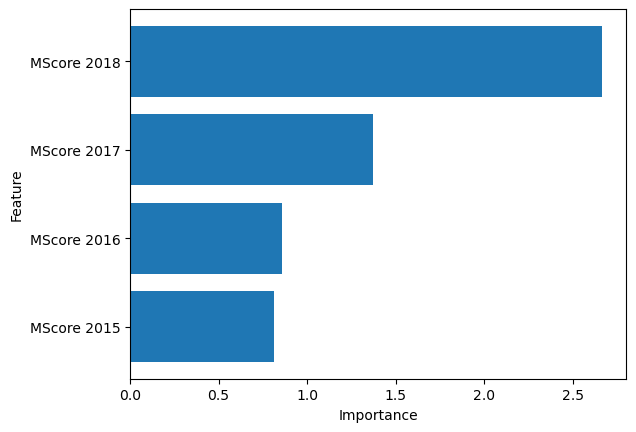

In [21]:
importance = lr.coef_[0]
importance=np.sort(importance)

sn.set_style()
plt.barh([i for i in range (len(importance))], importance)
plt.xlabel('Importance')
plt.ylabel('Feature')
list_ticks, features_names = [], []
for i in range(0, year_widget.value - 2014):
    list_ticks.append(i)
    features_names.append('MScore '+str(2015 + i))
plt.yticks(list_ticks, features_names)
plt.show()


In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, np.ravel(y_train))
print_performances('Decision Tree Classifier', dtc, X_train, y_train, X_test, y_test)


Decision Tree Classifier
 - Train accuracy: 81.9%
 - Test accuracy: 80.8%

Test               precision    recall  f1-score   support

           0       0.79      0.85      0.82      2429
           1       0.84      0.77      0.80      2429

    accuracy                           0.81      4858
   macro avg       0.81      0.81      0.81      4858
weighted avg       0.81      0.81      0.81      4858



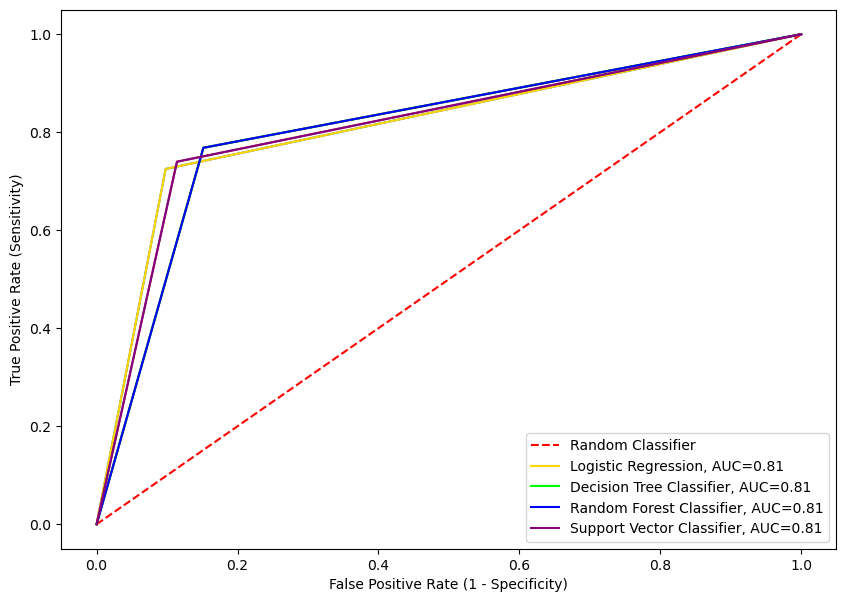

In [27]:
plt.figure(0, figsize=(10, 7)).clf()

colors = ['#ff0000', '#ffd700', '#00ff00', '#0000ff', '#800080']

# Random Classifier
random_fpr, random_tpr, _ = metrics.roc_curve(y_test, [0 for _ in range(len(y_test))])
plt.plot(random_fpr, random_tpr, linestyle='--', color=colors[0], label='Random Classifier')

# Logistic Regression
y_pred = lr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[1], label='Logistic Regression, AUC='+str(auc))

# Decision Tree Classifier
y_pred = dtc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[2], label='Decision Tree Classifier, AUC='+str(auc))

# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, np.ravel(y_train))

y_pred = rfc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[3], label='Random Forest Classifier, AUC='+str(auc))

# Support Vector Classifier
svc = SVC(kernel='poly', random_state=0)
svc.fit(X_train, np.ravel(y_train))

y_pred = svc.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
auc = round(metrics.roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr, tpr, color=colors[4], label='Support Vector Classifier, AUC='+str(auc))

plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.legend()
plt.show();
